In [17]:
import sqlite3

conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

In [19]:
cursor.execute('DROP TABLE IF EXISTS grades')
cursor.execute('DROP TABLE IF EXISTS students')


cursor.execute('''
CREATE TABLE students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

conn.commit()

In [21]:
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', [('Alice', 'Johnson'), ('Bob', 'Smith'), ('Carol', 'White'), ('David', 'Brown'), ('Eve', 'Davis')])

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', [(1, 'Math', 95), (1, 'English', 88), (1, 'History', 90),
      (2, 'Math', 82), (2, 'English', 76), (2, 'History', 85),
      (3, 'Math', 78), (3, 'English', 92), (3, 'History', 86),
      (4, 'Math', 90), (4, 'English', 85), (4, 'History', 88),
      (5, 'Math', 86), (5, 'English', 90), (5, 'History', 92)])

conn.commit()

In [23]:
def execute_query(query, description):
    print(f"\n## {description}")
    cursor.execute(query)
    results = cursor.fetchall()
    for row in results:
        print(row)

In [25]:
query1 = """
SELECT s.first_name, s.last_name, g.subject, g.grade 
FROM students s 
JOIN grades g ON s.student_id = g.student_id
"""
execute_query(query1, "All students' names and their grades")


## All students' names and their grades
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'English', 92)
('Carol', 'White', 'History', 86)
('David', 'Brown', 'Math', 90)
('David', 'Brown', 'English', 85)
('David', 'Brown', 'History', 88)
('Eve', 'Davis', 'Math', 86)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History', 92)


In [27]:
query2 = """
SELECT s.first_name, s.last_name, AVG(g.grade) as average_grade 
FROM students s 
JOIN grades g ON s.student_id = g.student_id 
GROUP BY s.student_id
"""
execute_query(query2, "Average grade for each student")


## Average grade for each student
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 85.33333333333333)
('David', 'Brown', 87.66666666666667)
('Eve', 'Davis', 89.33333333333333)


In [29]:
query3 = """
SELECT s.first_name, s.last_name, AVG(g.grade) as average_grade 
FROM students s 
JOIN grades g ON s.student_id = g.student_id 
GROUP BY s.student_id 
ORDER BY average_grade DESC 
LIMIT 1
"""
execute_query(query3, "Student with the highest average grade")


## Student with the highest average grade
('Alice', 'Johnson', 91.0)


In [31]:
query4 = """
SELECT AVG(grade) as average_math_grade 
FROM grades 
WHERE subject = 'Math'
"""
execute_query(query4, "Average grade for Math subject")


## Average grade for Math subject
(86.2,)


In [33]:
query5 = """
SELECT DISTINCT s.first_name, s.last_name 
FROM students s 
JOIN grades g ON s.student_id = g.student_id 
WHERE g.grade > 90
"""
execute_query(query5, "Students who scored above 90 in any subject")


## Students who scored above 90 in any subject
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Davis')


In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

In [37]:
students_df = pd.read_sql_query("SELECT * FROM students", conn)
grades_df = pd.read_sql_query("SELECT * FROM grades", conn)

print(students_df)
print(grades_df)

   student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     78
7          8           3  English     92
8          9           3  History     86
9         10           4     Math     90
10        11           4  English     85
11        12           4  History     88
12        13           5     Math     86
13        14           5  English     90
14        15           5  History     92


In [39]:
combined_df = pd.read_sql_query("""
SELECT s.first_name, s.last_name, g.subject, g.grade 
FROM students s 
JOIN grades g ON s.student_id = g.student_id
""", conn)

print(combined_df)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     78
7       Carol     White  English     92
8       Carol     White  History     86
9       David     Brown     Math     90
10      David     Brown  English     85
11      David     Brown  History     88
12        Eve     Davis     Math     86
13        Eve     Davis  English     90
14        Eve     Davis  History     92


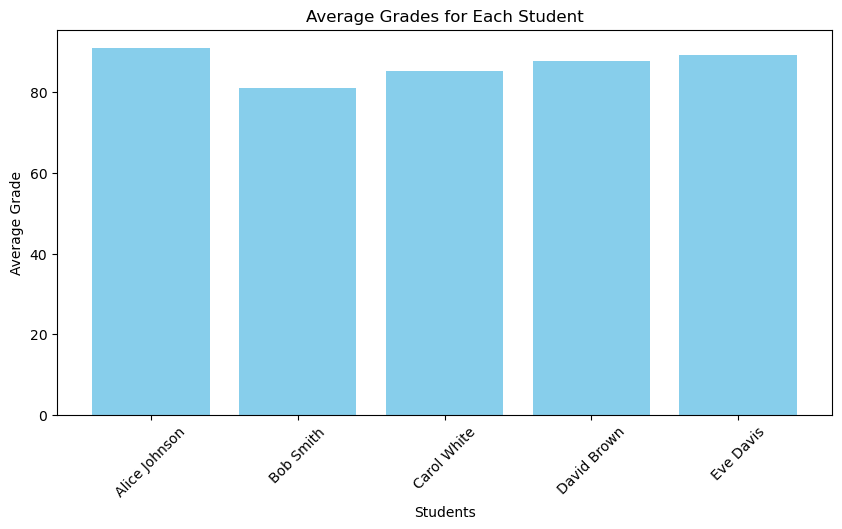

In [41]:
average_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_grades['first_name'] + ' ' + average_grades['last_name'], average_grades['grade'], color='skyblue')
plt.title('Average Grades for Each Student')
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.show()

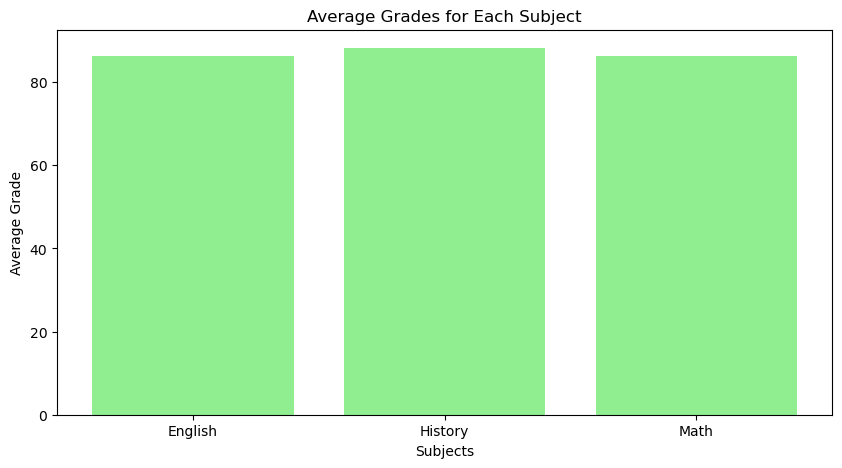

In [43]:
average_subject_grades = combined_df.groupby('subject')['grade'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_subject_grades['subject'], average_subject_grades['grade'], color='lightgreen')
plt.title('Average Grades for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.show()

In [45]:
query = """
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM grades g
JOIN students s ON s.student_id = g.student_id
WHERE (g.subject, g.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
)
"""
highest_grades_df = pd.read_sql_query(query, conn)
print(highest_grades_df)

  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Carol     White  English     92
2        Eve     Davis  History     92


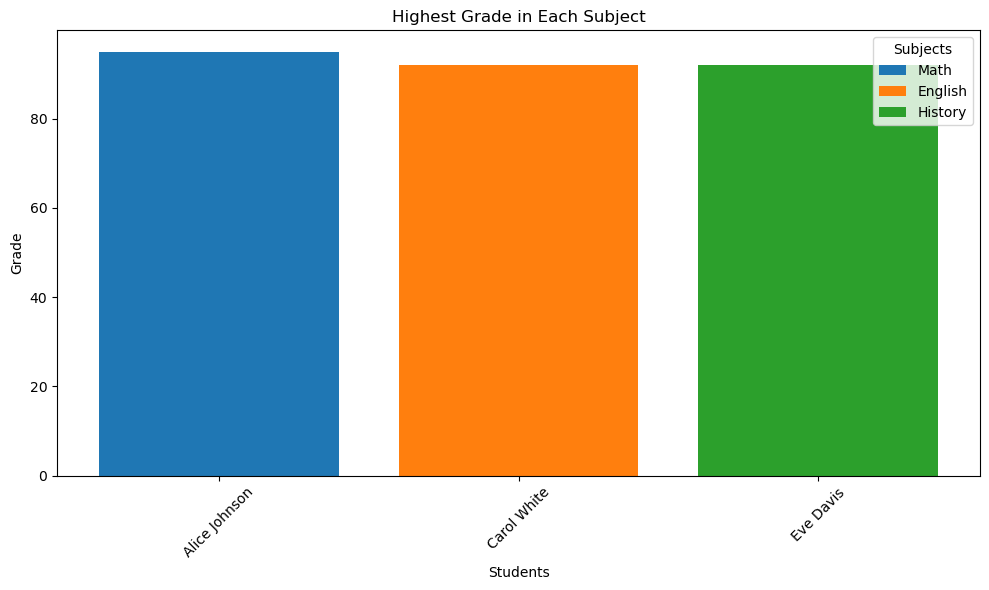

In [49]:
import matplotlib.pyplot as plt
import numpy as np

subjects = highest_grades_df['subject'].unique()
students = highest_grades_df['first_name'] + ' ' + highest_grades_df['last_name']
grades = highest_grades_df['grade']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each subject
for i, subject in enumerate(subjects):
    subject_grades = highest_grades_df[highest_grades_df['subject'] == subject]
    ax.bar(subject_grades['first_name'] + ' ' + subject_grades['last_name'], subject_grades['grade'], label=subject)

ax.set_title('Highest Grade in Each Subject')
ax.set_xlabel('Students')
ax.set_ylabel('Grade')
ax.legend(title='Subjects')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [51]:
conn.close()